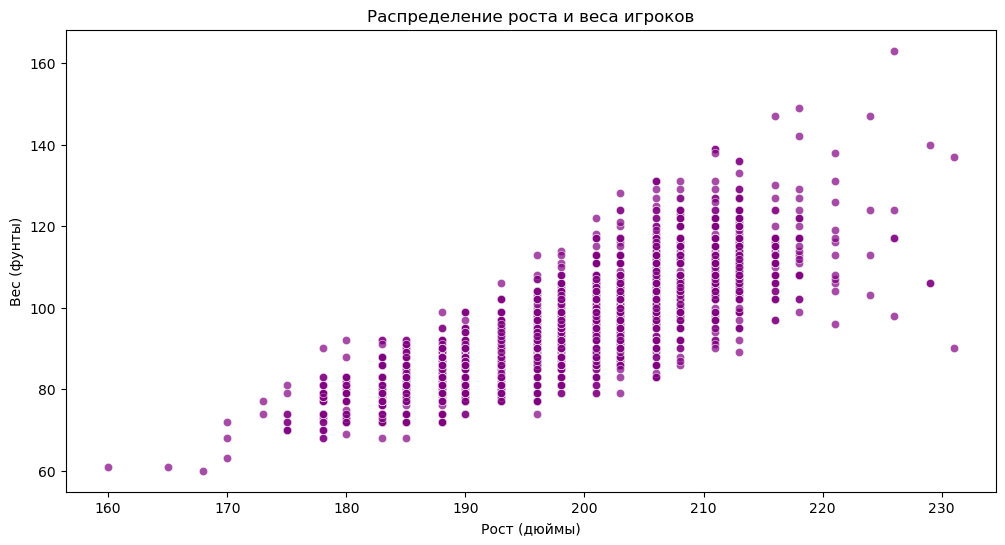

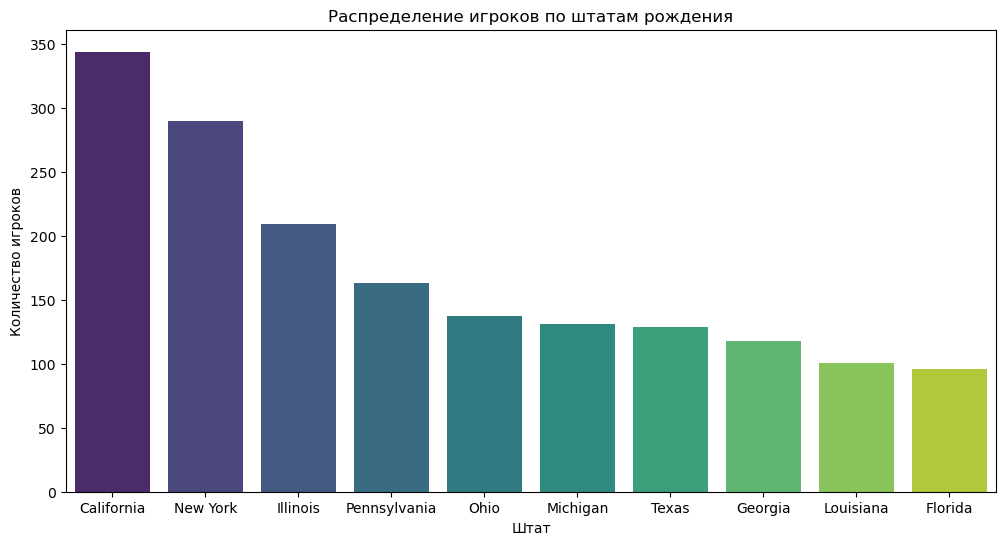

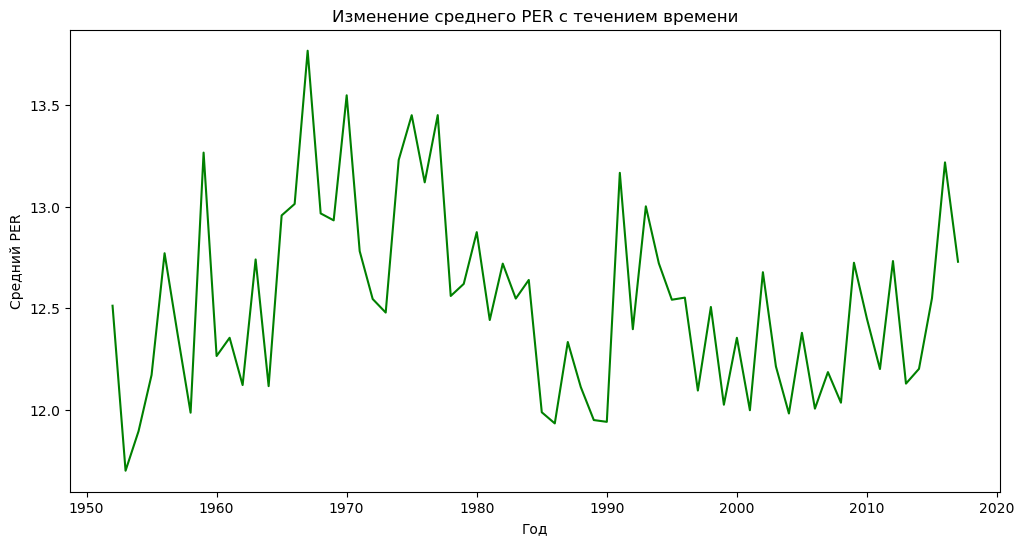

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
players_data = pd.read_csv("D:\\Players.csv")
seasons_stats_data = pd.read_csv("D:\\Seasons_Stats.csv")

# 1. Диаграмма рассеяния (для распределение роста и веса игроков)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='height', y='weight', data=players_data, color='purple', alpha=0.7)
plt.title('Распределение роста и веса игроков')
plt.xlabel('Рост (дюймы)')
plt.ylabel('Вес (фунты)')
plt.show()

# 2. Столбчатая диаграмма (для количества игроков по штатам рождения)
plt.figure(figsize=(12, 6))
birth_state_counts = players_data['birth_state'].value_counts().head(10)
sns.barplot(x=birth_state_counts.index, y=birth_state_counts.values, palette='viridis')
plt.title('Распределение игроков по штатам рождения')
plt.xlabel('Штат')
plt.ylabel('Количество игроков')
plt.show()

# 3. Линейный график() для изменения среднего PER с течением времени)
per_by_year = seasons_stats_data.groupby('Year')['PER'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=per_by_year.index, y=per_by_year.values, color='green')
plt.title('Изменение среднего PER с течением времени')
plt.xlabel('Год')
plt.ylabel('Средний PER')
plt.show()


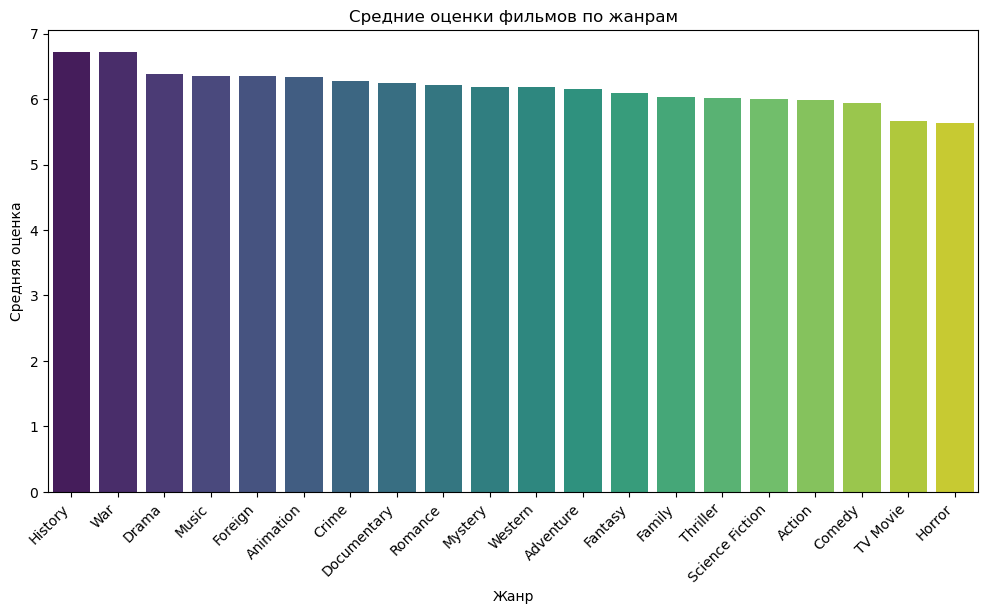

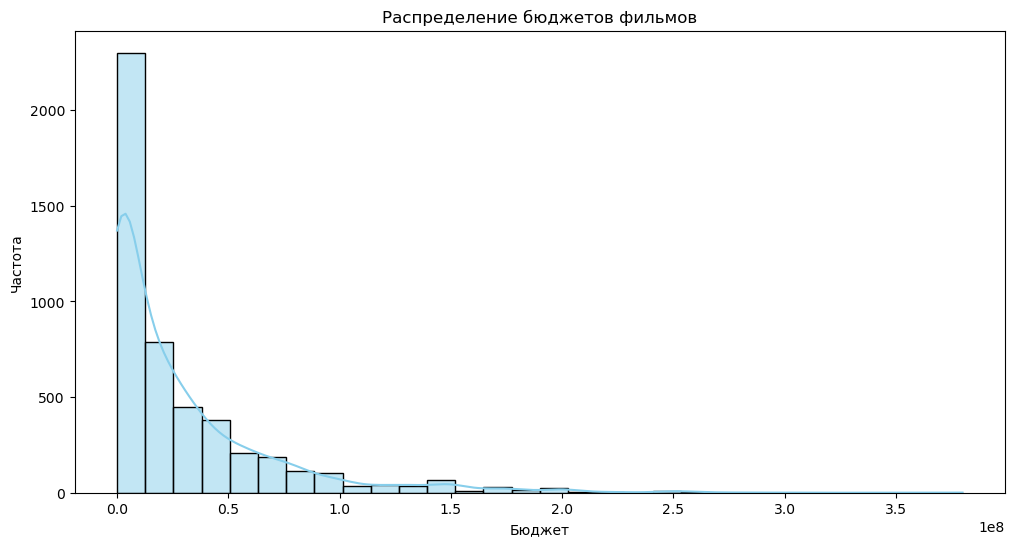

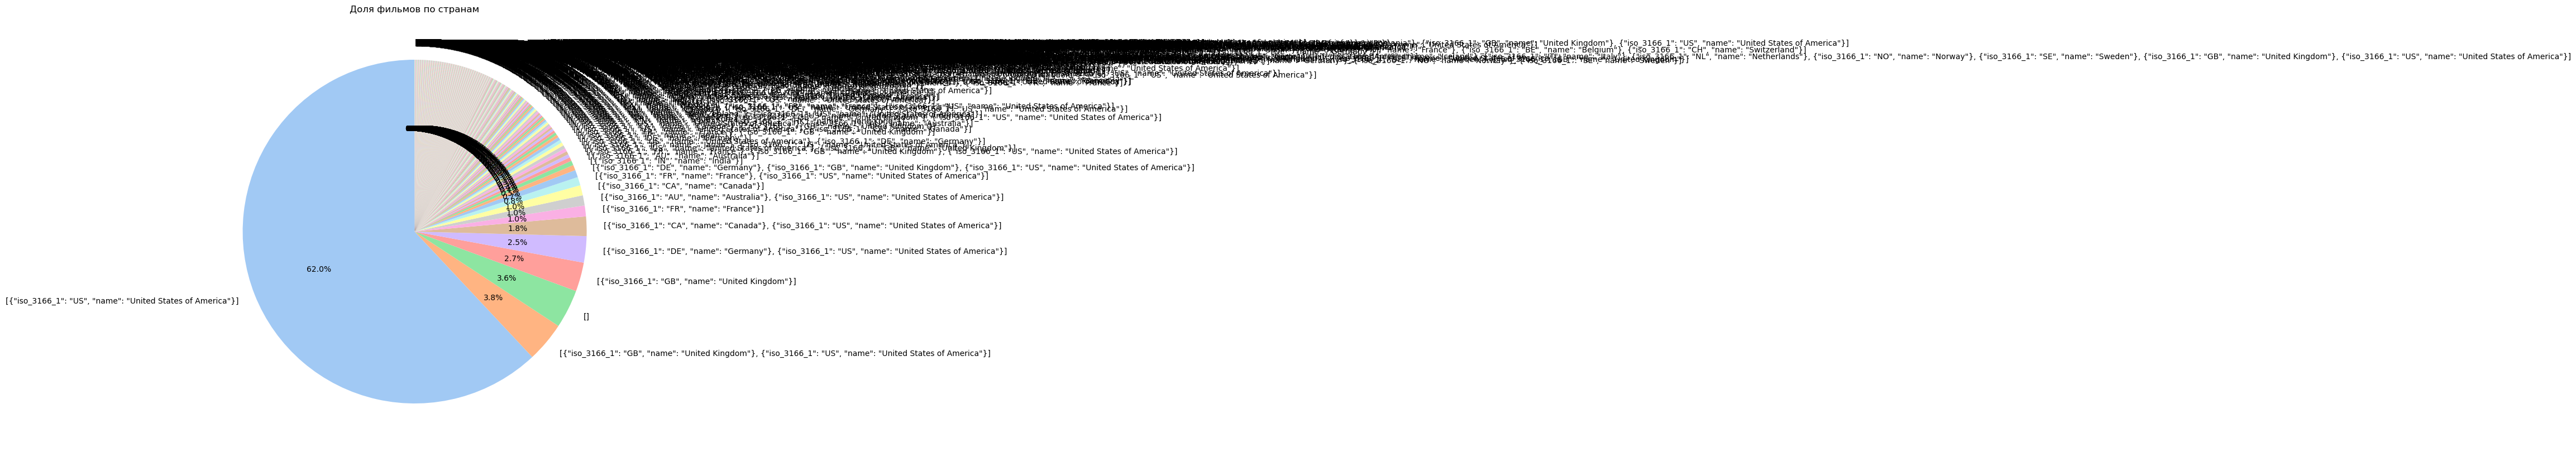

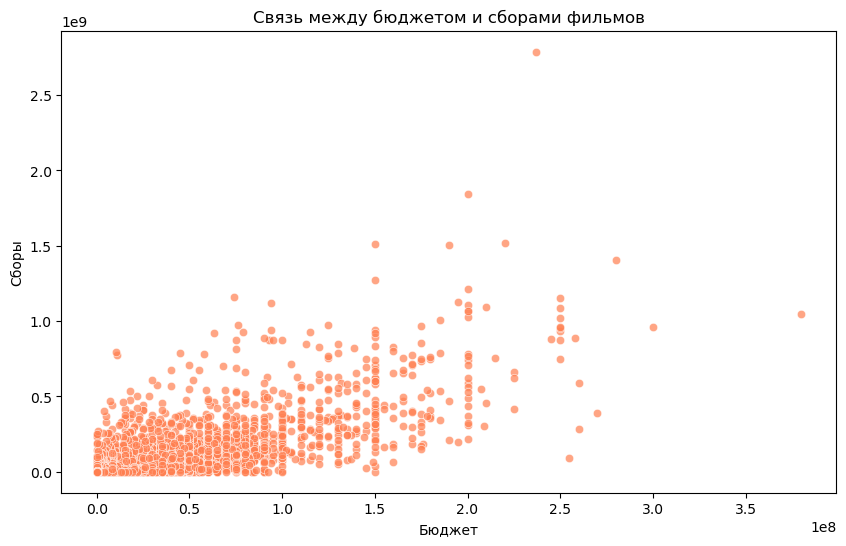

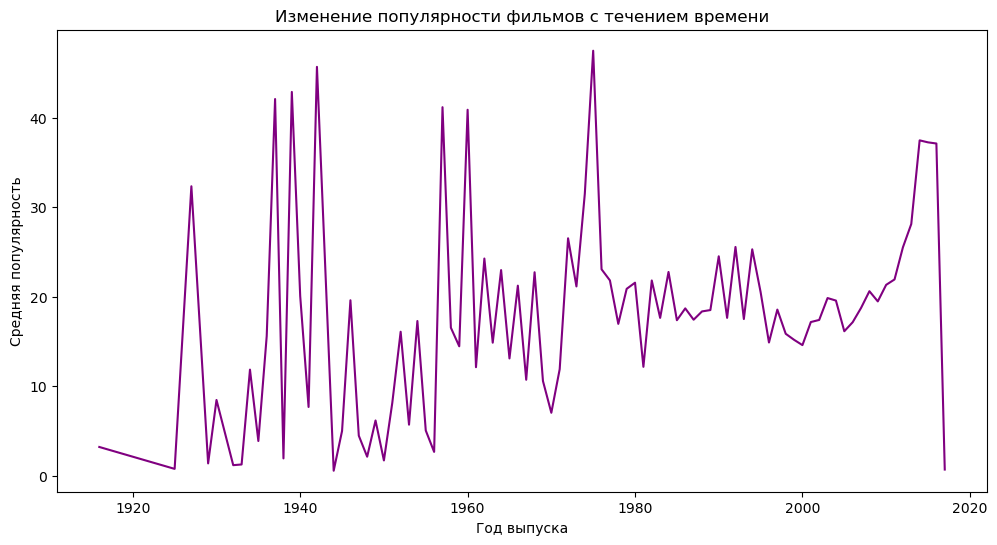

In [19]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файлов
credits = pd.read_csv("D:\\tmdb_5000_credits.csv")
movies = pd.read_csv("D:\\tmdb_5000_movies.csv")

# Объединение данных 
data = pd.merge(credits, movies, left_on='movie_id', right_on='id')

# Преобразование 
data['cast'] = data['cast'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# 1. Столбчатая диаграмма (для средних оценок фильмов по жанрам)
data['genre'] = data['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])
genre_ratings = data.explode('genre').groupby('genre')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')
plt.title('Средние оценки фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Гистограмма (для распределения бюджетов фильмов)
plt.figure(figsize=(12, 6))
sns.histplot(data['budget'], bins=30, kde=True, color='skyblue')
plt.title('Распределение бюджетов фильмов')
plt.xlabel('Бюджет')
plt.ylabel('Частота')
plt.show()

# 3. Круговая диаграмма (для доли разных стран в общем количестве произведенных фильмов)
country_counts = data['production_countries'].explode().value_counts()
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Доля фильмов по странам')
plt.show()

# 4. Диаграмма рассеяния (для визуализации связи между бюджетом и сборами фильмов)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data, color='coral', alpha=0.7)
plt.title('Связь между бюджетом и сборами фильмов')
plt.xlabel('Бюджет')
plt.ylabel('Сборы')
plt.show()

# 5. Линейный график (для отслеживания изменения популярности фильма с течением времени)
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
popularity_by_year = data.groupby(data['release_date'].dt.year)['popularity'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, color='purple')
plt.title('Изменение популярности фильмов с течением времени')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя популярность')
plt.show()